In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV and Preform Basic Data Cleaning

In [2]:
gender_df = pd.read_csv("data/gender_submission.csv")
test_df = pd.read_csv("data/test.csv")
train_df = pd.read_csv("data/train.csv")

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [6]:
##### Use the following fields in the model 
# Pclass, Sex, age, SibSp, Parch, fare 

##### Test and training variable sources (csv files)
# X_train - train.csv - split the survived into y_train 
# X_test - test.csv 
# y_train - target - survived from the train.csv 
# y_test - gender file 

# Establish the training sets

In [7]:
X_train = train_df[['Pclass', 'Sex', 'Survived','Age', 'SibSp', 'Parch', 'Fare']]

In [8]:
# Drop null values
X_train = X_train.dropna()

In [9]:
# Set the target variable
y_train = X_train['Survived']

In [10]:
y_train = y_train.values.reshape(-1, 1)

In [11]:
y_train.shape

(714, 1)

In [12]:
# Drop the target variable from X_train
X_train = X_train[['Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare']]

In [13]:
X_train.shape

(714, 6)

# Clean data for the test sets

In [14]:
# merge gender_df and test_df
merged_test_df = test_df.merge(gender_df, on='PassengerId')

In [15]:
merged_test_df  

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [16]:
merged_test_df = merged_test_df[['Pclass', 'Sex', 'Survived','Age', 'SibSp', 'Parch', 'Fare']]

In [17]:
merged_test_df

,Pclass,Sex,Survived,Age,SibSp,Parch,Fare
0,3,male,0,34.5,0,0,7.8292
1,3,female,1,47.0,1,0,7.0000
2,2,male,0,62.0,0,0,9.6875
3,3,male,0,27.0,0,0,8.6625
4,3,female,1,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,3,male,0,NaN,0,0,8.0500
414,1,female,1,39.0,0,0,108.9000
415,3,male,0,38.5,0,0,7.2500
416,3,male,0,NaN,0,0,8.0500


In [18]:
# Remove all null values from the testing set
merged_test_df = merged_test_df.dropna()

# Establish X and y test sets

In [19]:
X_test = merged_test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

In [20]:
X_test.shape

(331, 6)

In [21]:
y_test = merged_test_df['Survived']

In [22]:
y_test = y_test.values.reshape(-1,1)

In [23]:
# y_test = y_test.values.reshape(-1, 1)
y_test.shape

(331, 1)

# Encode the gender data

In [24]:
# Encode the sex column in the test set
X_test = X_test.copy()

X_test = pd.get_dummies(X_test, columns=["Sex"])
X_test.shape

(331, 7)

In [25]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,0,1
1,3,47.0,1,0,7.0000,1,0
2,2,62.0,0,0,9.6875,0,1
3,3,27.0,0,0,8.6625,0,1
4,3,22.0,1,1,12.2875,1,0


In [26]:
# Encode the sex column in the train set
X_train = X_train.copy()

X_train = pd.get_dummies(X_train, columns=["Sex"])
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1


# Scale the data

In [27]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [28]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Create, fit and validate the models

Support Vector Machine Linear Classifier

In [29]:
# Support vector machine linear classifier
from sklearn.svm import SVC 

y_train = y_train.reshape(-1)
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

SVC()

In [30]:
target_names = ["survive", "die"]

In [31]:
# Calculate classification report
from sklearn.metrics import classification_report
smv_predictions = svm_model.predict(X_test)
print(classification_report(y_test, smv_predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

     survive       0.67      0.83      0.74       204
         die       0.55      0.33      0.41       127

    accuracy                           0.64       331
   macro avg       0.61      0.58      0.58       331
weighted avg       0.62      0.64      0.62       331



In [32]:
from sklearn.metrics import accuracy_score
svm = accuracy_score(y_test,smv_predictions)*100
svm

64.04833836858006

Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)
ran_forest = random_forest.score(X_train, y_train)*100

In [34]:
ran_forest

98.59943977591037

In [35]:
importances = random_forest.feature_importances_
importances

array([0.09453096, 0.28856421, 0.04427101, 0.03481616, 0.2618117 ,
       0.13800674, 0.13799923])

In [36]:
feature_names = X_test.columns

In [37]:
# We can sort the features by their importance
sorted(zip(random_forest.feature_importances_, feature_names), reverse=True)

[(0.28856420766267854, 'Age'),
 (0.26181170176126234, 'Fare'),
 (0.1380067363315041, 'Sex_female'),
 (0.13799922529522676, 'Sex_male'),
 (0.09453095576511064, 'Pclass'),
 (0.044271011974592094, 'SibSp'),
 (0.03481616120962552, 'Parch')]

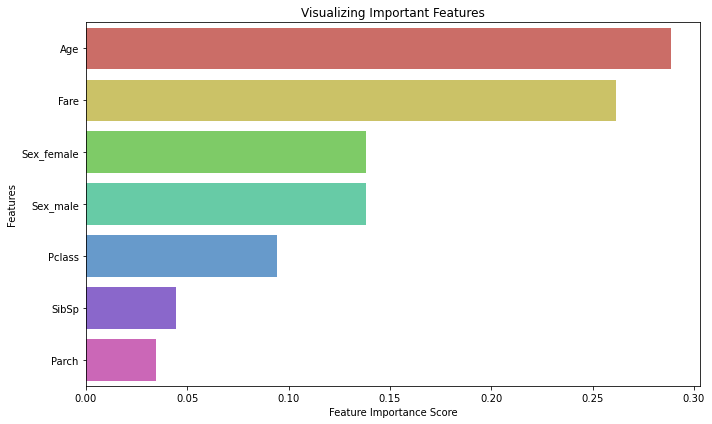

In [51]:
import seaborn as sns
feature_imp = pd.Series(random_forest.feature_importances_, index=feature_names).sort_values(ascending=False)

#print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index, palette='hls')
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()
plt.savefig("resource/images/Random_Forest.jpg")

Decision Tree Model

In [52]:
from sklearn import tree

decision_tree_classifier = tree.DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
prediction = decision_tree_classifier.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score

decision_tree = accuracy_score(y_test,prediction)*100
decision_tree

76.73716012084593

Logistic Regression Model

In [54]:
from sklearn.linear_model import LogisticRegression
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier

LogisticRegression(max_iter=1000)

In [55]:
y_train = y_train.reshape(-1)

In [56]:
y_train.shape

(714,)

In [57]:
# Fit the model using the training data
logreg_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [58]:
prediction = logreg_classifier.predict(X_test)

In [59]:
logistic_regression = accuracy_score(y_test,prediction)*100
logistic_regression

91.23867069486404

K Nearest Neighbors

k: 1, Train/Test Score: 0.465/0.438
k: 3, Train/Test Score: 0.629/0.568
k: 5, Train/Test Score: 0.633/0.568
k: 7, Train/Test Score: 0.634/0.577
k: 9, Train/Test Score: 0.634/0.571
k: 11, Train/Test Score: 0.634/0.562
k: 13, Train/Test Score: 0.632/0.553
k: 15, Train/Test Score: 0.676/0.616
k: 17, Train/Test Score: 0.675/0.607
k: 19, Train/Test Score: 0.634/0.544


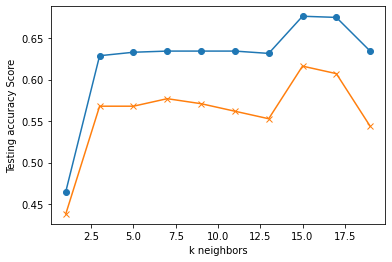

In [60]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train.ravel())
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")

plt.savefig("resource/images/KNN.jpg")

In [61]:
knn_classifier = KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(X_train_scaled, y_train.ravel())
knn = knn_classifier.score(X_test, y_test)*100
knn

57.09969788519638

In [62]:
results = pd.DataFrame({
    "Model" : ["Logistic Regression", "Random Forest", "Support Vector Machine", "K Nearest Neighbors", "Decision Tree"],
    "Score" : [logistic_regression, ran_forest, svm, knn, decision_tree]})

results_df = results.sort_values(by = "Score", ascending = False)
results_df = results_df.set_index("Model")
results_df

,Score
Model,
Random Forest,98.599440
Logistic Regression,91.238671
Decision Tree,76.737160
Support Vector Machine,64.048338
K Nearest Neighbors,57.099698


# Make predictions

In [63]:
# Generate a new data point
import numpy as np

### Prediction person data (Pclass = 1, 2, or 3)
Pclass = 1
Age = 20 
SibSp = 1 
Parch = 0
Fare = 75
Sex_female = 1
Sex_male = 0

new_person = np.array([[Pclass, Age, SibSp, Parch, Fare, Sex_female, Sex_male]])
new_person

array([[ 1, 20,  1,  0, 75,  1,  0]])

In [64]:
### Prediction person number 2
Pclass = 3
Age = 45 
SibSp = 1 
Parch = 2
Fare = 20
Sex_female = 0
Sex_male = 1

new_person2 = np.array([[Pclass, Age, SibSp, Parch, Fare, Sex_female, Sex_male]])
new_person2

array([[ 3, 45,  1,  2, 20,  0,  1]])

In [65]:
# Predict whether or not the new people survive
new_people = [new_person, new_person2]

for person in new_people:    
    print("--------------------------------------------")
    print(f"Here are the predictions that our classifiers made for {person}")
    svm_predictions = svm_model.predict(person)
    if svm_predictions == 0:
        print(f"Support vector machine: perish")
    else:
        print(f"Support vector machine: survive")
    
    rf_predictions_1 = random_forest.predict(person)
    if rf_predictions_1 == 0:
        print(f"Random forest: perish")
    else:
        print(f"Random forest: surive")

    lg_predictions = logreg_classifier.predict(person)
    if lg_predictions == 0:
        print(f"Logistic regression: surive")
    else:
        print(f"Logistic regression: surive")
    
    knn_predictions = knn_classifier.predict(person)
    if knn_predictions == 0:
        print(f"K-nearest neighbors: surive")
    else:
        print(f"K-nearest neighbors: surive")
    
    dt_predictions = decision_tree_classifier.predict(person)
    if dt_predictions == 0:
        print(f"Decision tree: surive")
    else:
        print(f"Decision tree: surive")

--------------------------------------------
Here are the predictions that our classifiers made for [[ 1 20  1  0 75  1  0]]
Support vector machine: survive
Random forest: surive
Logistic regression: surive
K-nearest neighbors: surive
Decision tree: surive
--------------------------------------------
Here are the predictions that our classifiers made for [[ 3 45  1  2 20  0  1]]
Support vector machine: perish
Random forest: perish
Logistic regression: surive
K-nearest neighbors: surive
Decision tree: surive
